# SARIMA

1. Decomposition (No. of periods in seasonal cycle)
2. Auto ARIMA
3. Spliting data into Train and Test set
4. Model Training
5. Prediction
6. Model Evaluation
7. Retrain and forecast the future

<Strong><a href="http://datagyani.in/index.php/2021/09/01/analyze-time-series-data/">HOW TO ANALYZE TIME SERIES DATA…</a></Strong>

In [1]:
#let's import all the neccessary libraries
import pandas as pd # data processing
import numpy as np # data processing
import os #helps changing directory and locating your file
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse #evaluation metric
import warnings
warnings.filterwarnings("ignore")

In [2]:
#changing directory
os.chdir('D:\\blog/Time Series')
os.getcwd()

'D:\\blog\\Time Series'

In [3]:
#reading the dataset
airline = pd.read_csv('airline.csv',index_col='Month',parse_dates=True)
#dropping NA if any in the dataset
airline.dropna(inplace=True)
airline.index.freq = 'MS'
#printing the  the first five column
airline.head()

,Passengers(in thousands)
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


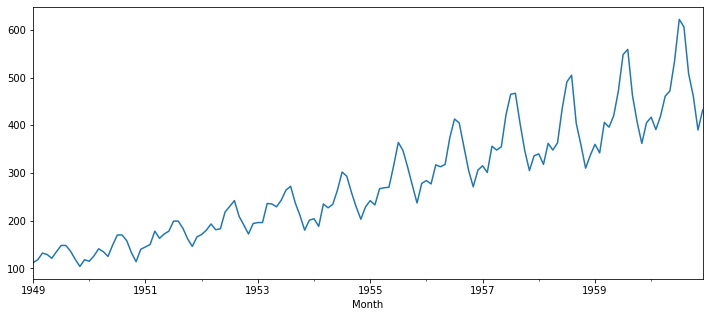

In [4]:
airline['Passengers(in thousands)'].plot(figsize=(12,5));

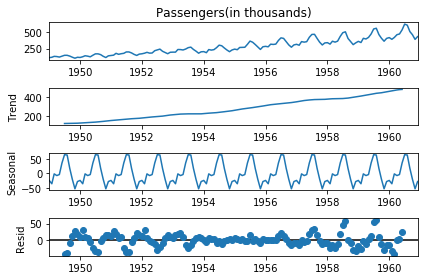

In [5]:
decomp = seasonal_decompose(airline['Passengers(in thousands)'], model='add')  
decomp.plot();

In [6]:
#We will use auto arima to find the right values of (p,d,q) and (P,D,Q). Putting m=12 as its clearly visible above graphs
auto_arima(airline['Passengers(in thousands)'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sun, 15 Nov 2020   AIC                           1017.847
Time:                                     04:57:24   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.986      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.596      0.000      -1.057      -0.907
sigma2       129.3188     14.558      8.883      0.000     100.786     157.851
===================================================================================
Ljung-Box (Q):                       47.73   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.19   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Model suggested- SARIMAX(2, 1, 1)x(0, 1, [], 12) 

In [7]:
#Train and test split
#making first 110 entries as training set and rest as test set
train = airline.iloc[:110] 
test = airline.iloc[110:]

In [8]:
#Fitting the model suggesteed value
S_model = SARIMAX(train['Passengers(in thousands)'],order=(2,1,1),seasonal_order=(1,0,[],12),enforce_stationarity=False)
S_fit = S_model.fit()
S_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:            Passengers(in thousands)   No. Observations:                  110
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 12)   Log Likelihood                -345.615
Date:                             Sun, 15 Nov 2020   AIC                            701.230
Time:                                     04:57:24   BIC                            713.999
Sample:                                 01-01-1949   HQIC                           706.389
                                      - 02-01-1958                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6150      1.117     -0.551      0.582      -2.805       1.575
ar.L2         -0.0244      0.422     -0.058      0.954      -0.852       0.804
ma.L1          0.3104      1.108      0.280      0.779      -1.861       2.482
ar.S.L12       1.1144      0.040     28.112      0.000       1.037       1.192
sigma2        84.5755     13.040      6.486      0.000      59.018     110.133
===================================================================================
Ljung-Box (Q):                       49.18   Jarque-Bera (JB):                 1.80
Prob(Q):                              0.15   Prob(JB):                         0.41
Heteroskedasticity (H):               0.61   Skew:                             0.22
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
#Prediction
start=len(train)
end=len(train)+len(test)-1
predictions = S_fit.predict(start=start, end=end, dynamic=False, typ='levels').rename('Predictions')

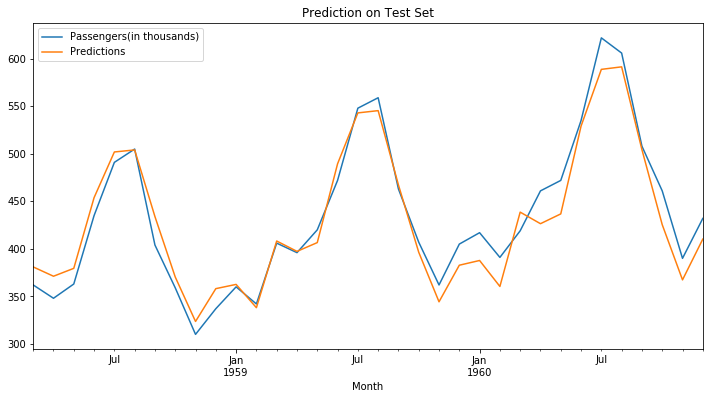

In [10]:
test['Passengers(in thousands)'].plot(legend=True,figsize=(12,6),title="Prediction on Test Set")
predictions.plot(legend=True)

In [11]:
RMSE = rmse(test['Passengers(in thousands)'], predictions)
print(f'RMSE Error: {RMSE}')

RMSE Error: 19.685763786929314


In [12]:
#Retrain and Forecast
final_model = SARIMAX(airline['Passengers(in thousands)'],order=(2,1,1),seasonal_order=(1,0,[],12),enforce_stationarity=False)
final = final_model.fit()
forecast = final.predict(len(airline),len(airline)+11,typ='levels').rename('Forecast')

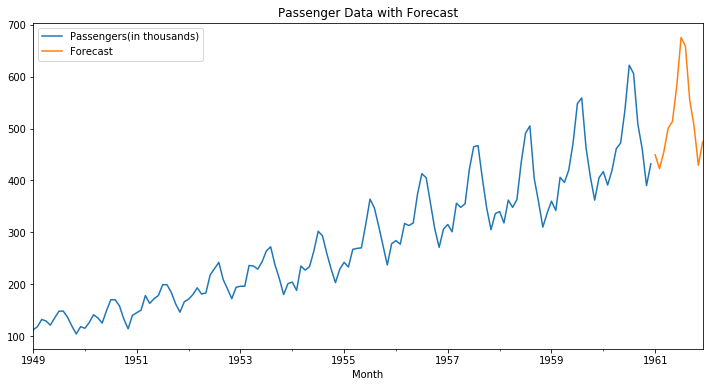

In [13]:
airline['Passengers(in thousands)'].plot(legend=True,figsize=(12,6),title="Passenger Data with Forecast")
forecast.plot(legend=True)